In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
covid = BayesNet()
covid.load_from_bifxml('testing/Use_Case.BIFXML')

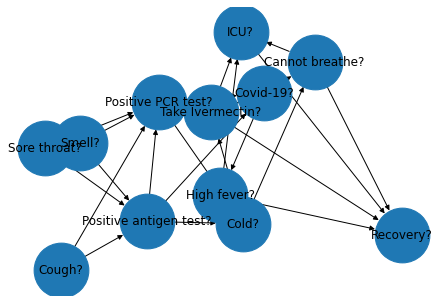

In [4]:
covid.draw_structure()

In [5]:
covid.get_all_variables()

['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [6]:
covid.get_all_cpts()

{'Cough?':    Cough?     p
 0   False  0.95
 1    True  0.05, 'Smell?':    Smell?     p
 0   False  0.02
 1    True  0.98, 'Sore throat?':    Sore throat?     p
 0         False  0.95
 1          True  0.05, 'Positive PCR test?':     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
 0                    False         False   False   False               False   
 1                    False         False   False   False                True   
 2                    False         False   False    True               False   
 3                    False         False   False    True                True   
 4                    False         False    True   False               False   
 5                    False         False    True   False                True   
 6                    False         False    True    True               False   
 7                    False         False    True    True                True   
 8                    False          True 

In [7]:
covid.get_children('ICU?')

['Recovery?']

In [8]:
covid.get_all_edges()

[('Cough?', 'Positive PCR test?'),
 ('Cough?', 'Positive antigen test?'),
 ('Smell?', 'Positive PCR test?'),
 ('Smell?', 'Positive antigen test?'),
 ('Sore throat?', 'Positive PCR test?'),
 ('Sore throat?', 'Positive antigen test?'),
 ('Positive PCR test?', 'Cold?'),
 ('Positive PCR test?', 'Covid-19?'),
 ('Positive antigen test?', 'Positive PCR test?'),
 ('Positive antigen test?', 'Cold?'),
 ('Positive antigen test?', 'Covid-19?'),
 ('Covid-19?', 'Take Ivermectin?'),
 ('Covid-19?', 'High fever?'),
 ('Covid-19?', 'Cannot breathe?'),
 ('Cold?', 'Take Ivermectin?'),
 ('Cold?', 'High fever?'),
 ('Cold?', 'Cannot breathe?'),
 ('Cannot breathe?', 'ICU?'),
 ('Cannot breathe?', 'Recovery?'),
 ('High fever?', 'ICU?'),
 ('High fever?', 'Recovery?'),
 ('Take Ivermectin?', 'ICU?'),
 ('Take Ivermectin?', 'Recovery?'),
 ('ICU?', 'Recovery?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(covid)

In [10]:
x = ['Sore throat?', 'Cold?']
y = ['Cough?', 'ICU?']
z = ['Take Ivermectin?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree(covid)

Mindegree heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [12]:
print('Minfill heuristic: ')

reasoner.ordering_minfill(covid)

Minfill heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

# c) Network Pruning

In [13]:
q = ['ICU?']
e = pd.Series({'Covid-19?': True, 'Cold?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('ICU?')

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


## d) Marginal distributions

### summing-out: 

In [15]:
factor = covid.get_cpt('ICU?')
factor

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [16]:
reasoner.sum_out(factor, ['ICU?'])

,Take Ivermectin?,High fever?,Cannot breathe?,p
0,False,False,False,1.0
1,False,False,True,1.0
2,False,True,False,1.0
3,False,True,True,1.0
4,True,False,False,1.0
5,True,False,True,1.0
6,True,True,False,1.0
7,True,True,True,1.0


### multiplying

In [17]:
hospital = covid.get_cpt('ICU?')
hospital

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [18]:
Joe_Rogan = covid.get_cpt('Take Ivermectin?')
Joe_Rogan

,Cold?,Covid-19?,Take Ivermectin?,p
0,False,False,False,1.000
1,False,False,True,0.000
2,False,True,False,0.995
3,False,True,True,0.005
4,True,False,False,0.950
5,True,False,True,0.050
6,True,True,False,0.950
7,True,True,True,0.050


In [30]:
hospital = covid.get_cpt('ICU?')
Joe_Rogan = covid.get_cpt('Take Ivermectin?')

In [20]:
reasoner.mult([Joe_Rogan, hospital])

,Cold?,Covid-19?,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,False,False,1.0000
1,False,False,False,False,False,True,0.0000
2,False,False,False,False,True,False,0.7000
3,False,False,False,False,True,True,0.3000
4,False,False,False,True,False,False,0.6000
...,...,...,...,...,...,...,...
59,True,True,True,False,True,True,0.0350
60,True,True,True,True,False,False,0.0100
61,True,True,True,True,False,True,0.0400
62,True,True,True,True,True,False,0.0075


### get marginal

In [21]:
evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ["Recovery?", "ICU?"]

marginals = reasoner.get_marginal_distribution('random', query_vars, evidence)

In [22]:
marginals

,ICU?,Recovery?,p
0,False,False,0.007605
0,False,True,0.405794
0,True,False,0.000748
0,True,True,0.005419


## MPE

In [24]:
reasoner.MPE('mindegree')

(          p Cough? Smell? Sore throat? Positive PCR test?  \
 8  0.280128  False   True        False              False   
 
   Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?  \
 8                  False     False  True           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 8            False  False      True  , 1086, 0, 1086)

In [25]:
reasoner.MPE('minfill')

(          p Cough? Smell? Sore throat? Positive PCR test?  \
 8  0.280128  False   True        False              False   
 
   Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?  \
 8                  False     False  True           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 8            False  False      True  , 1086, 0, 1086)

In [26]:
reasoner.MPE('random')

(          p Positive PCR test? Sore throat? Smell? Cannot breathe?  \
 1  0.280128              False        False   True           False   
 
   High fever? Recovery? Take Ivermectin? Covid-19?   ICU? Cold?  \
 1       False      True            False     False  False  True   
 
   Positive antigen test? Cough?  
 1                  False  False  , 1094, 0, 1094)

In [27]:
reasoner.MAP('mindegree', map_vars = ['Covid-19?'])

(  Covid-19?         p
 0      True  0.637355, 70, 68, 2)

In [28]:
reasoner.MAP('minfill', map_vars = ['Covid-19?'])

(  Covid-19?         p
 0      True  0.637355, 70, 68, 2)

In [29]:
reasoner.MAP('random', map_vars = ['Covid-19?'])

(  Covid-19?         p
 0      True  0.637355, 94, 92, 2)

### **A-priori marginal query**
#### What is the probability of 'ICU?' being True?

### **A-posterior marginal query**
##### What is the probability **'Recovery?'** being True given that **'ICU?'** is True and **'Cannot breathe?'** is False?

### **MAP query**
##### What is the most likely instantiation of **'Covid-19?'** given **'Cough?'**, **'Loss of smell?'**, and **'Sore throat?'** are True?

In [ ]:
reasoner.MAP('mindegree', map_vars = ['Covid-19?'])

### **MPE query**
##### What is the most likely instantiation given that **'Positive PCR test?'** is True and **'Positive antigen test?'** is True.

In [ ]:
reasoner.MPE('mindegree', pd.Series({'Positive PCR test?': True, 'Positive antigen test?':True}))
